# Прогнозирование оттока клиентов

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Цель

**Основная задача:** В течении 2-х недель разработать модель, которая могла бы прогнозировать отток клиентов у оператора связи «Ниединогоразрыва.ком». (решать задачу классификации клиентов на потенциально уходящих и на отсающихся). Ключевая метрика по настоянию заказчика - roc-auc. Дополнительная метрика, более наглядная для коллег из бизнеса, accuracy.

## План работы

### Загрузим данные

В нашем распряжении 4 таблицы, в которых имеется общий столбец `customerID`:
- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Таблицы стоит объединить. Объединять целесобразно по столбцу `customerID`, он будет служить индексом объединенной таблицы. Столбцы объединенной таблицы будут признаками, на которых обучится наша модель.

Тут необходимо уточнить у заказчика правильно ли мы понимаем названия столбцов объединенной таблицы:
* `customer_id` - код клиента
* `begin_date` - дата заключения договора обслуживания
* `end_date` - дата разрыва договора обслуживания
* `type` - тип договора: двухлетний (Two year), однолетний (One year) или ежемесячный (Month-to-month)
* `paperless_billing` - выставление счета (факт?)
* `payment_method` - способ оплаты
* `monthly_charges` - среднемесячные траты на услуги
* `total_charges` - общие траты на услуги
* `internet_service` - тип подключения интернета: через телефонную линию (DSL) или оптоволоконный кабель (Fiber optic)
* `online_security` - услуга блокировки небезопасных сайтов
* `online_backup` - услуга облачного хранилища файлов
* `device_protection` - услуга антивирус 
* `tech_support` - услуга выделенной линии технической поддержки
* `streaming_tv` - услуга стримингового телевидения
* `streaming_movies` - услуга каталога фильмов
* `gender` - пол клиента
* `senior_citizen` - пенсионный статус клиента
* `partner` - супружеский статус клиента (наличие или отсутствие супруга/супруги?)
* `dependents` - статус наличия иждивенцев (детей?)
* `multiple_lines` - услуга парролельных линий

### Изучим и подготовим данные

Проверим данные на дубликаты и пропуски. Ключевой момент, на мой взгляд, - это правильно сформировать признаки. Выделим целевой признак, это скорее всего `end_date`. Поработаем с остальными признаками: при необходимости добавим новые категории и удалим ненужные для исследования признаки. Если получится, то попробуем рассмотреть данные в контексте времянных рядов: оценим как менялась стоимость услуг и повлияло ли это на отток клиентов. Оценим корреляцию и мультиколлениарность. К категориальным признакам применим технику Прямого кодирования (One-Hot Encoding, OHE). Численные признаки для линейных моделей смасштабируем.  
  
Уже сейчас, даже не проводя анализа данных, можно выдвинуть 2 гипотезы, проверим их позднее:  
1. Чем на больший срок клиент заключает договор, тем ниже шанс, что клиент уйдет.  
2. Чем ниже стоимость оказания услуг, тем ниже шанс, что клиент уйдет.  

Выделим выборки для обучения и тесторования модели.  
В выводе постараемся визуализировать найденные закономерности и подтвержденные гипотезы.

### Построим и обучим модель

Выберем 5 моделей. LightGBM, CatBoost и XGBoost точно будем использовать, а еще 2 модели попробуем найти в интернете, возможно, они покажут хорошие результаты. Точность модели будем оценивать с помощью метрики AUC-ROC, она устойчива к несбалансированным классам. Получившиеся модели проверим на адекватность при помощи DummyClassifier.

### Лучшую модель проверим на тестовой выборке

Оценим результат лучшей модели на тестовой выборке. В случае неудачи, вернемся к формированию признаков и начнем все сначала.

### Оформим общий вывод

Пишем вывод с рекомендацией к использованию лучшей модели для прогнозирования оттока клиентов.

**План:**  
  
**1) Импорт библиотек и загрузка данных**
 - Первичный анализ данных
  
**2) Предобработка и исследовательский анализ данных**
 - Предобработка
 - Создание новых признаков
 - Исследовательский анализ данных / визуализация
 - Кодирование категориальных признаков и масштабирование данных
 - Подготовка обучающей и тестовой выборок
 - Вывод
 
**3) Обучение модели**
 - Подготовка таблицы с результатами
 - Logistic Regression
 - Random Forest
 - LightGBM
 - CatBoost
 - Support Vector Machine
 - Проверка моделей на адекватность
 - Проверка лучшей модели на тестовой выборке
 - Вывод

**4) Общий Вывод**

**5) Отчет по исследовательской работе**

## Импортируем библиотеки

In [1]:
!pip install phik
!pip install imblearn
!pip install category_encoders
!pip install scikit-plot
!pip install catboost
!pip install shap
try:
    !pip install sklearn
except:
    !pip install scikit-learn

In [2]:
import pandas as pd
import re
import phik
import seaborn as sns
import numpy as np
import time
import category_encoders as ce
import scikitplot as skplt
import shap
import warnings

from statsmodels.stats.outliers_influence import variance_inflation_factor
from phik import resources, report
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, plot_confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from imblearn.pipeline import Pipeline
from datetime import datetime, timedelta

RS = 130323
#CV = KFold(n_splits = 5, random_state = RS, shuffle = True)
#CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
CV = 5

warnings.filterwarnings("ignore", category=FutureWarning)

### Загружаем данные

In [3]:
try:
    df_contract = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/contract.csv', index_col='customerID')
    df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/internet.csv', index_col='customerID')
    df_personal = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/personal.csv', index_col='customerID')
    df_phone = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/phone.csv', index_col='customerID')
    
except:
    df_contract = pd.read_csv('contract.csv', index_col='customerID')
    df_internet = pd.read_csv('internet.csv', index_col='customerID')
    df_personal = pd.read_csv('personal.csv', index_col='customerID')
    df_phone = pd.read_csv('phone.csv', index_col='customerID')      


### Первичный анализ данных

Проверим код клиента на наличие дубликатов:

In [4]:
print('Количество уникальных клиентов:', pd.concat([df_contract, df_internet, df_personal, df_phone]).index.nunique())

Количество уникальных клиентов: 7043


Напишим функцию, которая будет выводить информацию о датафрейме:

In [5]:
def df_info(temp_df):
    display(
        temp_df.sample(5),
        temp_df.info(),
        temp_df.describe(include='all'),
    )

In [6]:
df_info(df_contract)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
2900-PHPLN,2014-04-01,No,Two year,Yes,Credit card (automatic),19.55,1462.05
1891-QRQSA,2014-10-01,No,Two year,Yes,Bank transfer (automatic),111.60,7099
7089-IVVAZ,2019-05-01,2020-01-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),103.35,847.3
5647-URDKA,2019-06-01,No,Two year,No,Mailed check,19.70,130.25
0013-MHZWF,2019-05-01,No,Month-to-month,Yes,Credit card (automatic),69.40,571.45


None

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043.000000,7043
unique,77,5,3,2,4,NaN,6531
top,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [7]:
df_info(df_internet)

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
4349-GFQHK,DSL,No,No,Yes,No,No,No
8938-UMKPI,Fiber optic,No,Yes,Yes,No,Yes,Yes
7783-YKGDV,Fiber optic,Yes,Yes,Yes,No,No,Yes
3070-BDOQC,Fiber optic,No,Yes,Yes,No,Yes,Yes
2207-NHRJK,DSL,No,Yes,No,No,No,No


None

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3498,3088,3095,3473,2810,2785


In [8]:
df_info(df_personal)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
2621-UDNLU,Female,0,Yes,No
3413-CSSTH,Male,0,No,No
9163-GHAYE,Female,0,No,No
7434-SHXLS,Female,0,No,No
8631-WUXGY,Female,0,No,Yes


None

,gender,SeniorCitizen,Partner,Dependents
count,7043,7043.000000,7043,7043
unique,2,NaN,2,2
top,Male,NaN,No,No
freq,3555,NaN,3641,4933
mean,NaN,0.162147,NaN,NaN
std,NaN,0.368612,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,0.000000,NaN,NaN
75%,NaN,0.000000,NaN,NaN


In [9]:
df_info(df_phone)

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


,MultipleLines
customerID,
5054-IEXZT,No
1170-SASML,Yes
5055-MGMGF,Yes
6848-YLDFR,No
6439-LAJXL,No


None

,MultipleLines
count,6361
unique,2
top,No
freq,3390


__Вывод:__ Код клиента (`customerID`) уникален и не повторяется дважды, значит таблицы можно объединить по индексу `customerID`. В данных присутствуют пропуски, это связано с тем, что оператор предоставляет два основных типа услуг: Стационарную телефонную связь и Интернет, при этом клиенты могут пользоваться одной, не подключив вторую.

Все слова в названии столбцов написаны слитно и с заглавной буквы.<br>
Тогда, напишем функцию с циклом, которая будет:
 1. перебирать названия столбцов,
 2. находить заглавные буквы и ставить `_` перед ними,
 3. приводить заглавные буквы к нижнему регистру,
 4. удалять все `_` в начале названия каждого столбца,
 5. заменять все `__` на `_`.
 6. заменять все `_i_d` на `_id`.
 7. заменять все `_t_v` на `_tv`.

In [10]:
def columns_rename(temp):
    for i in range(len(temp)):
        temp[i] = re.sub(r"([A-Z])", lambda x: '_' + x.group(0).lower(), str(temp[i]))
        if temp[i][0] == "_":
            temp[i] = temp[i][1:]
        if "__" in temp[i]:
            temp[i] = re.sub(r"__", lambda x: '_', str(temp[i]))
        if "_i_d" in temp[i]:
            temp[i] = re.sub(r"_i_d", lambda x: '_id', str(temp[i]))
        if "_t_v" in temp[i]:
            temp[i] = re.sub(r"_t_v", lambda x: '_tv', str(temp[i]))
    return temp

Объединим осходные датафреймы:

In [11]:
df = df_contract.join([df_internet, df_personal, df_phone])

Переименуем столбцы с помощью функции `columns_rename`:

In [12]:
df.columns = columns_rename(df.columns.tolist())
df.index.names = ['customer_id']

Оценим получившуюся таблицу с помощью функции `df_info`:

In [13]:
df_info(df)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7043 non-null   object 
 1   end_date           7043 non-null   object 
 2   type               7043 non-null   object 
 3   paperless_billing  7043 non-null   object 
 4   payment_method     7043 non-null   object 
 5   monthly_charges    7043 non-null   float64
 6   total_charges      7043 non-null   object 
 7   internet_service   5517 non-null   object 
 8   online_security    5517 non-null   object 
 9   online_backup      5517 non-null   object 
 10  device_protection  5517 non-null   object 
 11  tech_support       5517 non-null   object 
 12  streaming_tv       5517 non-null   object 
 13  streaming_movies   5517 non-null   object 
 14  gender             7043 non-null   object 
 15  senior_citizen     7043 non-null   int64  
 16  partner       

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
4929-XIHVW,2019-12-01,No,Month-to-month,Yes,Credit card (automatic),95.50,181.65,Fiber optic,No,No,Yes,No,Yes,Yes,Male,1,Yes,No,No
6917-FIJHC,2014-02-01,No,Two year,Yes,Mailed check,26.00,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,Yes,No,Yes
7668-XCFYV,2018-09-01,No,Month-to-month,Yes,Electronic check,92.55,1614.7,Fiber optic,No,No,No,No,Yes,Yes,Female,1,Yes,No,Yes
0260-ZDLGK,2019-01-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,72.90,651.4,DSL,No,No,Yes,Yes,Yes,Yes,Female,0,No,Yes,No
2335-GSODA,2018-03-01,No,Two year,No,Mailed check,40.10,857.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,Yes,NaN


None

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
count,7043,7043,7043,7043,7043,7043.000000,7043,5517,5517,5517,5517,5517,5517,5517,7043,7043.000000,7043,7043,6361
unique,77,5,3,2,4,NaN,6531,2,2,2,2,2,2,2,2,NaN,2,2,2
top,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,,Fiber optic,No,No,No,No,No,No,Male,NaN,No,No,No
freq,366,5174,3875,4171,2365,NaN,11,3096,3498,3088,3095,3473,2810,2785,3555,NaN,3641,4933,3390
mean,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162147,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368612,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


In [14]:
df.columns.tolist()

['begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'multiple_lines']

# Вторая часть работы - Код

Создадим копию объединенного датафрейма, чтобы была возможность к нему вернуться в случае необходимости:

In [15]:
df_orig = df.copy()

Проверим,на всякий случай, есть ли у нас договора разорванные раньше, чем были заключены:

In [16]:
df_orig[(df_orig['begin_date'] >= df_orig['end_date'])]

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,


Таких не оказалось.

## Предобработка данных

### Предобработка столбцов

#### Столбцы `begin_date` и `begin_year`

Столбец `begin_date` хранит информацию о дате начала пользования клиентом услугами компании. Переведем его в формат `datetime`, чтобы в дальнейшем с ним было удобно работать.  
Создадим столбец `begin_year`, в котором будем хранить наименование года начала использования услугами клиентом. Столбец будет категориальным, поэтому приведем его к типу данных `object`.

In [17]:
df['begin_date'] = pd.to_datetime(df['begin_date'], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values(by='begin_date', ascending=True)
#df['begin_year'] = df['begin_date'].dt.year.astype('str')

#### Столбец `service_in_days_duration` и `service_start_days_ago_duration`

Создадим столбец `service_in_days_duration`. Он будет отражать продолжительность использования клиентом услуг компании. Ранее я выдвигал гипотезу, что этот признак должен стать одним из ключевых для нашей модели.  
Продолжительность использования услугами - это разность между `end_date` и `begin_date`. В столбце `end_date` присутствуют значения `No`, которые согнализируют о том, что клиент еще не перестал пользоваться услугами компании, такие значения мы заменим на дату среза базы данных. Столбец приведем к типу данных `int`.

Создадим столбец `service_start_days_ago_duration`. Это будет интерпритация столбца `begin_date`, он будет содержать количество дней со дня начала использования клиентом услугами компании по день среза базы данных. Теперь столбец `begin_date` можно удалить.

In [19]:
df['service_start_days_ago_duration'] = (datetime.strptime("2020-02-01", "%Y-%m-%d") - df['begin_date']) // np.timedelta64(1, 'D') 

df['in_df'] = df['begin_date'].copy().astype('str')
df.loc[(df['in_df'] >= '2019-10-01'), 'in_df'] = "Yes"
df.loc[(df['in_df'] < '2019-10-01'), 'in_df'] = "No"

df = df.drop('begin_date', axis = 1)

In [20]:
df['in_df'].value_counts()

No     6105
Yes     938
Name: in_df, dtype: int64

#### Столбец `target`

Столбец `end_date` переименуем в `target`, это будет наш целевой признак. Значение `NO` изменим на `0`, а информацию с датой окончания пользования услугами компании на `1`. Столбец приведем к типу данных `int`.

In [21]:
df = df.rename(columns = {'end_date': 'target'})
df.loc[(df['target'] == 'No'), 'target'] = '0'
df.loc[(df['target'] != '0'), 'target'] = '1'
df['target'] = df['target'].astype('int')

Посмотрим, что у нас получилось:

In [22]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8580-QVLOC to 2775-SEFEE
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   target                           7043 non-null   int32  
 1   type                             7043 non-null   object 
 2   paperless_billing                7043 non-null   object 
 3   payment_method                   7043 non-null   object 
 4   monthly_charges                  7043 non-null   float64
 5   total_charges                    7043 non-null   object 
 6   internet_service                 5517 non-null   object 
 7   online_security                  5517 non-null   object 
 8   online_backup                    5517 non-null   object 
 9   device_protection                5517 non-null   object 
 10  tech_support                     5517 non-null   object 
 11  streaming_tv                     5517 non-null   object 
 12  streaming_

,target,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,service_start_days_ago_duration,in_df
customer_id,,,,,,,,,,,,,,,,,,,,
3009-JWMPU,1,One year,Yes,Electronic check,96.75,6125.4,Fiber optic,No,No,Yes,No,Yes,Yes,Male,0,No,No,Yes,1918,No
4979-HPRFL,0,Two year,No,Bank transfer (automatic),24.15,1402.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,Yes,1706,No
6923-AQONU,0,Two year,No,Mailed check,20.90,454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,No,702,No
1122-YJBCS,0,One year,Yes,Credit card (automatic),53.65,3804.4,DSL,Yes,Yes,No,No,No,No,Male,0,Yes,No,No,2102,No
1329-VHWNP,0,Month-to-month,No,Bank transfer (automatic),25.05,189.95,DSL,No,No,No,No,No,No,Female,0,No,No,NaN,215,No
4686-GEFRM,0,Two year,Yes,Bank transfer (automatic),98.70,6858.9,Fiber optic,No,Yes,Yes,Yes,No,Yes,Male,0,Yes,No,Yes,2132,No
6859-QNXIQ,0,Two year,Yes,Bank transfer (automatic),113.10,8248.5,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Female,0,Yes,Yes,Yes,2191,No
9786-YWNHU,0,Two year,No,Mailed check,63.55,4014.2,DSL,Yes,Yes,Yes,Yes,No,No,Female,0,Yes,Yes,No,1918,No
6240-EURKS,1,Month-to-month,Yes,Electronic check,35.00,553,DSL,No,No,No,No,No,Yes,Female,0,No,Yes,NaN,580,No


#### Столбец `total_charges`

Этот столбец содержит информацию по общим тратам клиента на усгули компании. Оценим значения данных в столбце:

In [23]:
df['total_charges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
1261.45     1
943.1       1
4729.75     1
5153.5      1
1955.4      1
Name: total_charges, Length: 6531, dtype: int64

Наблюдаем аномалию данных - 11 пустых значений, оценим их:

In [24]:
df_orig[df['total_charges'] == ' ']

Boolean Series key will be reindexed to match DataFrame index.


,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,DSL,Yes,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,NaN
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,Yes,No
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,Yes
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,NaN
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,No
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,Yes
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,Yes,Yes,No
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,No


По условию задания срез базы был взят на 01 февраля 2020 года. У клиентов с пустыми значениями в столбце `total_charges`, дата начала пользования услугами компании тоже 01 февраля 2020. Полагаю, что эти строки не так важны для исследования, их можно удалить. Столбцу изменим тип данных на `flat`.

In [25]:
df = df[df['total_charges'] != ' ']
df['total_charges'] = df['total_charges'].astype('float')
df.shape

(7032, 20)

#### Столбец `phone_service`

Создадим столбец, который будет содержать информацию, пользуется ли клиент услугой телефонной линии.

In [26]:
df['phone_service'] = df['multiple_lines'].copy()
df.loc[(df['phone_service'] == 'No'), 'phone_service'] = 'Yes'

Посмотрим, что получилось:

In [27]:
display(
    df['phone_service'].nunique(),
    df['phone_service'].value_counts(),
    df['phone_service'].isna().sum()
)

1

Yes    6352
Name: phone_service, dtype: int64

680

Только 680 клиентов не пользуются услугой телефонной линии.

#### Столбцы `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` и `phone_service`.

Эти столбцы отражают услуги, которые предоставляет компания клиентам, это наши категориальные признаки. Пропуски в данных говорят о том, что клиент не пользуется данной услугой. Поэтому пропуски заменим на "No".  
Оценим пропуски в нашем датафрейме:

In [28]:
df.isna().sum()

target                                0
type                                  0
paperless_billing                     0
payment_method                        0
monthly_charges                       0
total_charges                         0
internet_service                   1520
online_security                    1520
online_backup                      1520
device_protection                  1520
tech_support                       1520
streaming_tv                       1520
streaming_movies                   1520
gender                                0
senior_citizen                        0
partner                               0
dependents                            0
multiple_lines                      680
service_start_days_ago_duration       0
in_df                                 0
phone_service                       680
dtype: int64

Пропуски есть только в перечисленных столбцах. Заменим их на значение `No`.

In [29]:
df = df.fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 8580-QVLOC to 4195-NZGTA
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   target                           7032 non-null   int32  
 1   type                             7032 non-null   object 
 2   paperless_billing                7032 non-null   object 
 3   payment_method                   7032 non-null   object 
 4   monthly_charges                  7032 non-null   float64
 5   total_charges                    7032 non-null   float64
 6   internet_service                 7032 non-null   object 
 7   online_security                  7032 non-null   object 
 8   online_backup                    7032 non-null   object 
 9   device_protection                7032 non-null   object 
 10  tech_support                     7032 non-null   object 
 11  streaming_tv                     7032 non-null   object 
 12  streaming_

#### Столбец `senior_citizen`

Стобец представляет собой бинарный признак в числовой форме записи (0, 1). Где-то я читал, что некоторые модели могут воспринимать этот признак не как 2 отдельные категории, а как числа. Другими словами, модель будет думать: если 1 > 0, значит 1 лучше 0. Поэтому заменю тип данных в столбце, и дополнительно сменю значения: 0 на "No", а 1 на "Yes".

In [30]:
df['senior_citizen'] = df['senior_citizen'].astype('str')
df.loc[(df['senior_citizen'] == "0"), 'senior_citizen'] = 'No'
df.loc[(df['senior_citizen'] == "1"), 'senior_citizen'] = 'Yes'

Оценим, что у нас получилось:

In [31]:
df.sample(10)

,target,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,service_start_days_ago_duration,in_df,phone_service
customer_id,,,,,,,,,,,,,,,,,,,,,
4178-EGMON,0,Two year,Yes,Credit card (automatic),88.00,5986.45,Fiber optic,Yes,Yes,No,...,No,No,Male,No,Yes,No,Yes,2132,No,Yes
0258-NOKBL,0,Month-to-month,No,Electronic check,90.40,268.45,Fiber optic,No,Yes,Yes,...,No,Yes,Male,No,No,No,No,92,Yes,Yes
7108-DGVUU,0,One year,No,Bank transfer (automatic),71.70,1497.05,DSL,No,Yes,Yes,...,No,Yes,Female,Yes,Yes,No,Yes,641,No,Yes
5076-YVXCM,0,Month-to-month,No,Bank transfer (automatic),83.40,4149.45,Fiber optic,No,No,No,...,No,Yes,Male,No,No,No,Yes,1553,No,Yes
8535-SFUTN,0,Month-to-month,Yes,Electronic check,106.45,6300.15,Fiber optic,Yes,No,Yes,...,Yes,Yes,Male,No,No,No,Yes,1857,No,Yes
2954-PIBKO,0,Two year,Yes,Credit card (automatic),64.15,4254.10,DSL,Yes,No,Yes,...,No,No,Female,No,Yes,Yes,Yes,2102,No,Yes
2951-QOQTK,1,Month-to-month,No,Credit card (automatic),80.80,332.45,Fiber optic,No,No,No,...,No,No,Male,No,No,Yes,Yes,153,No,Yes
0274-JKUJR,0,Month-to-month,No,Mailed check,58.85,465.70,DSL,Yes,Yes,Yes,...,Yes,Yes,Male,No,Yes,Yes,No,215,No,No
9570-KYEUA,0,Two year,No,Credit card (automatic),99.25,6549.45,Fiber optic,Yes,No,Yes,...,No,Yes,Male,No,No,No,Yes,1949,No,Yes


#### Столбец `services_count`

Создадим столбец, где посчитаем количество подключенных сервисов у клиента компании. Для этого напишим функцию:

In [32]:
def services_count (row):
    count = 0
    if row['internet_service'] != 'No':
        count += 1
    if row['online_security'] == 'Yes':
        count += 1
    if row['online_backup'] == 'Yes':
        count += 1
    if row['device_protection'] == 'Yes':
        count += 1
    if row['tech_support'] == 'Yes':
        count += 1
    if row['streaming_tv'] == 'Yes':
        count += 1
    if row['streaming_movies'] == 'Yes':
        count += 1
    if row['multiple_lines'] == 'Yes':
        count += 1
    if row['phone_service'] == 'Yes':
        count += 1        
    return count

In [33]:
df['services_count'] = df.apply(services_count, axis=1).astype('int')

#### Вывод

Мы обработали пропуски и пустые значения. Привели данные к нужному типу для исследовательского анализа, создали несколько новых столбцов для формирования признаков и удалили ненужные столбцы.

## Исследовательский анализ данных с визуализацией

### Оценим распределение признаков

#### Распределение целевого признака `target`

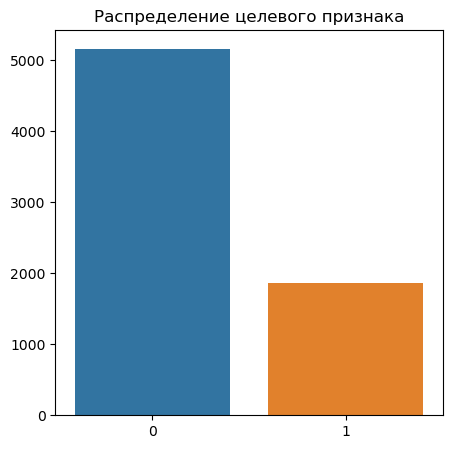

In [34]:
plt.subplots(figsize=(5, 5))
ax = sns.countplot(df['target'])
plt.setp(ax, xlabel=None, ylabel=None, title='Распределение целевого признака')
plt.show()

In [35]:
df['target'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: target, dtype: float64

**Вывод:** распределение целевого признака примерно 73.4% на 26.6%, что говорит о наличии дисбалланса

#### Оценим распределение категориальных признаков

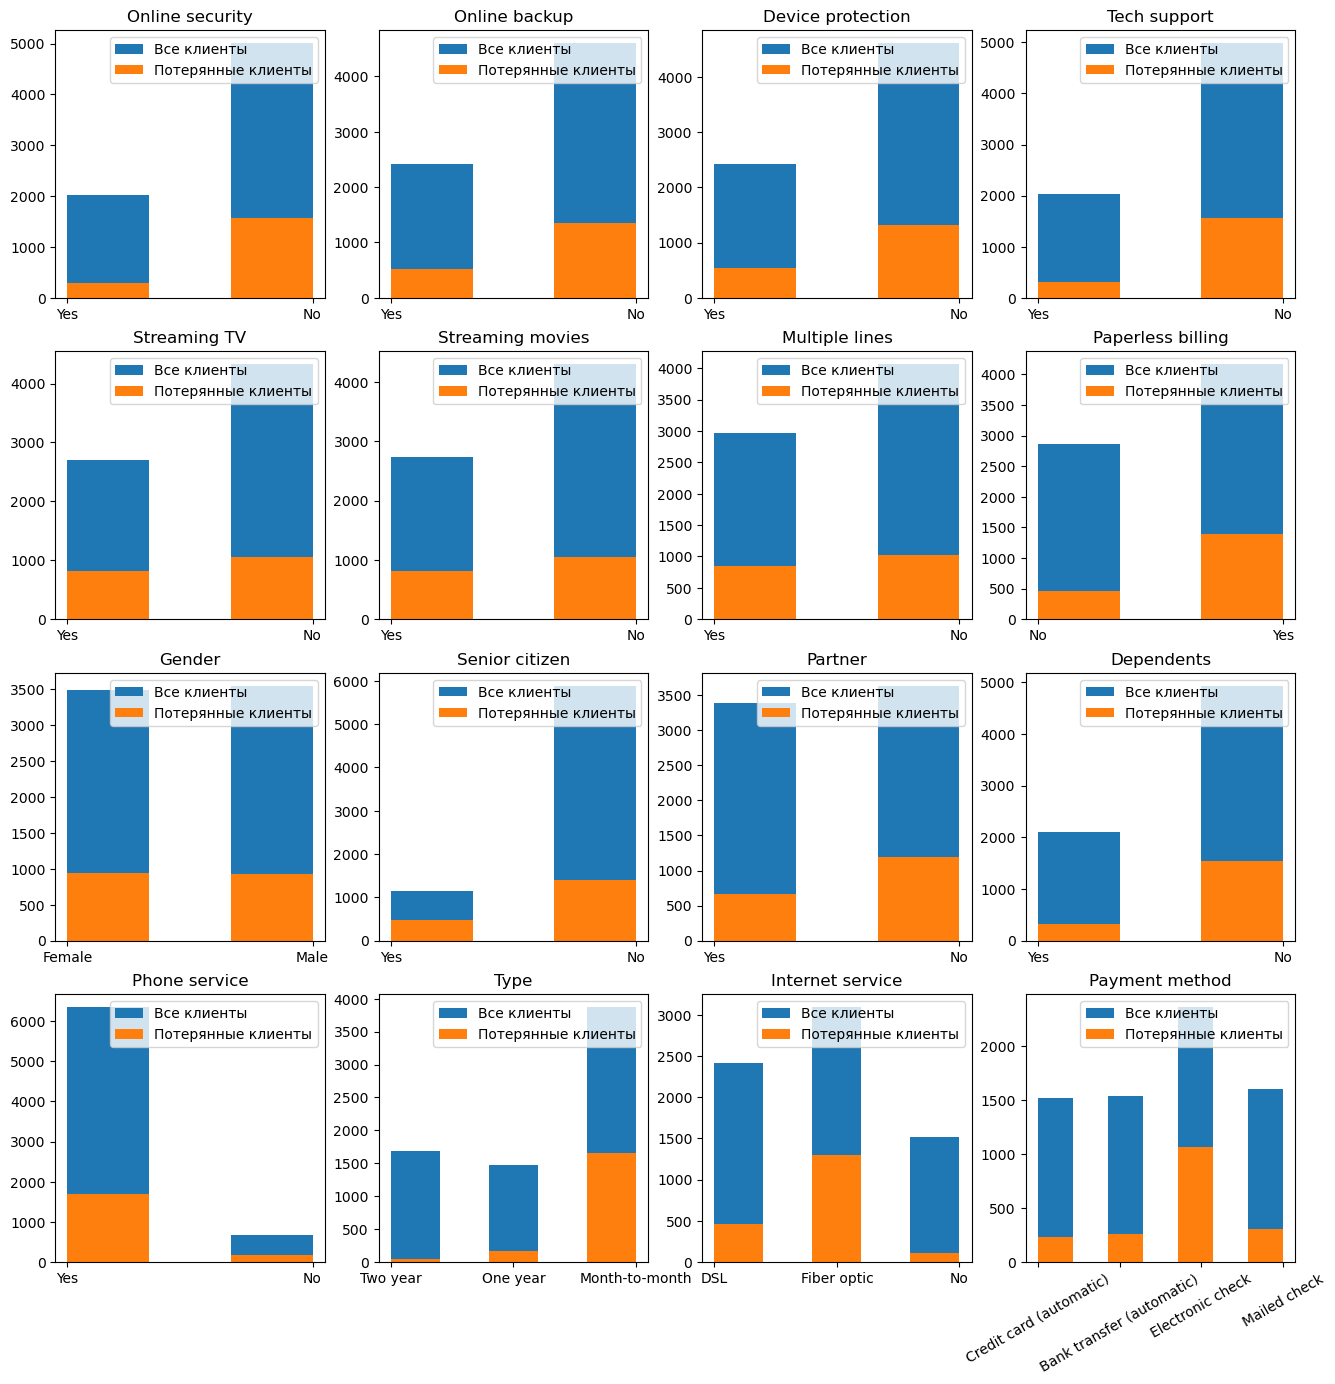

In [36]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))

plt.setp(plt.xticks()[1], rotation=30)

ax[0,0].hist(df['online_security'], bins = 3)
ax[0,0].hist(df[df['target'] == 1]['online_security'], bins = 3)
ax[0,0].set_title('Online security')

ax[0,1].hist(df['online_backup'], bins = 3)
ax[0,1].hist(df[df['target'] == 1]['online_backup'], bins = 3)
ax[0,1].set_title('Online backup')

ax[0,2].hist(df['device_protection'], bins = 3)
ax[0,2].hist(df[df['target'] == 1]['device_protection'], bins = 3)
ax[0,2].set_title('Device protection')

ax[0,3].hist(df['tech_support'], bins = 3)
ax[0,3].hist(df[df['target'] == 1]['tech_support'], bins = 3)
ax[0,3].set_title('Tech support')

ax[1,0].hist(df['streaming_tv'], bins = 3)
ax[1,0].hist(df[df['target'] == 1]['streaming_tv'], bins = 3)
ax[1,0].set_title('Streaming TV')

ax[1,1].hist(df['streaming_movies'], bins = 3)
ax[1,1].hist(df[df['target'] == 1]['streaming_movies'], bins = 3)
ax[1,1].set_title('Streaming movies')

ax[1,2].hist(df['multiple_lines'], bins = 3)
ax[1,2].hist(df[df['target'] == 1]['multiple_lines'], bins = 3)
ax[1,2].set_title('Multiple lines')

ax[1,3].hist(df['paperless_billing'], bins = 3)
ax[1,3].hist(df[df['target'] == 1]['paperless_billing'], bins = 3)
ax[1,3].set_title('Paperless billing')

ax[2,0].hist(df['gender'], bins = 3)
ax[2,0].hist(df[df['target'] == 1]['gender'], bins = 3)
ax[2,0].set_title('Gender')

ax[2,1].hist(df['senior_citizen'], bins = 3)
ax[2,1].hist(df[df['target'] == 1]['senior_citizen'], bins = 3)
ax[2,1].set_title('Senior citizen')

ax[2,2].hist(df['partner'], bins = 3)
ax[2,2].hist(df[df['target'] == 1]['partner'], bins = 3)
ax[2,2].set_title('Partner')

ax[2,3].hist(df['dependents'], bins = 3)
ax[2,3].hist(df[df['target'] == 1]['dependents'], bins = 3)
ax[2,3].set_title('Dependents')

ax[3,0].hist(df['phone_service'],bins = 3)
ax[3,0].hist(df[df['target'] == 1]['phone_service'],bins = 3)
ax[3,0].set_title('Phone service')

ax[3,1].hist(df['type'] ,bins = 5)
ax[3,1].hist(df[df['target'] == 1]['type'] ,bins = 5)
ax[3,1].set_title('Type')

ax[3,2].hist(df['internet_service'], bins = 5)
ax[3,2].hist(df[df['target'] == 1]['internet_service'], bins = 5)
ax[3,2].set_title('Internet service')

ax[3,3].hist(df['payment_method'], bins = 7)
ax[3,3].hist(df[df['target'] == 1]['payment_method'], bins = 7)
ax[3,3].set_title('Payment method')

for i in range(4):
    for j in range(4):
        ax[i,j].legend(['Все клиенты', 'Потерянные клиенты'])

**Вывод:**  
 - распределение `Type` показывает, что клиенты заключившие договора на 1 и 2 года практически не покидают компанию.
 - распределение `Payment method` показывает, что клиенты предпочитающие `Electronic check` более склонны к разрыву договора.
 - распределение `Internet service` показывает, что клиенты предпочитающие `Fiber optic` более склонны к разрыву договора, возможно, стоит рекомендовать компании проверить качество оказания услуг оптоволоконной связи. Так же стоит отметить, что клиенты без подключения услуг интернета практически не разрывают договора с компанией.
 - клиенты, пользующиеся услугами `Online security` и `Tech support`, менее склонны к разрыву договора с компанией.
 - распределения `Gender`, `Senior citizen`, `Partner`, `Dependents`, `Phone service` и `Multiple lines` скорее всего слабо повлияют на обучаемость нашей модели, их можно рекомендовать к удалению.
 - в остальных признаках распределение близкое к нормальному.

#### Оценим распределение числовых признаков

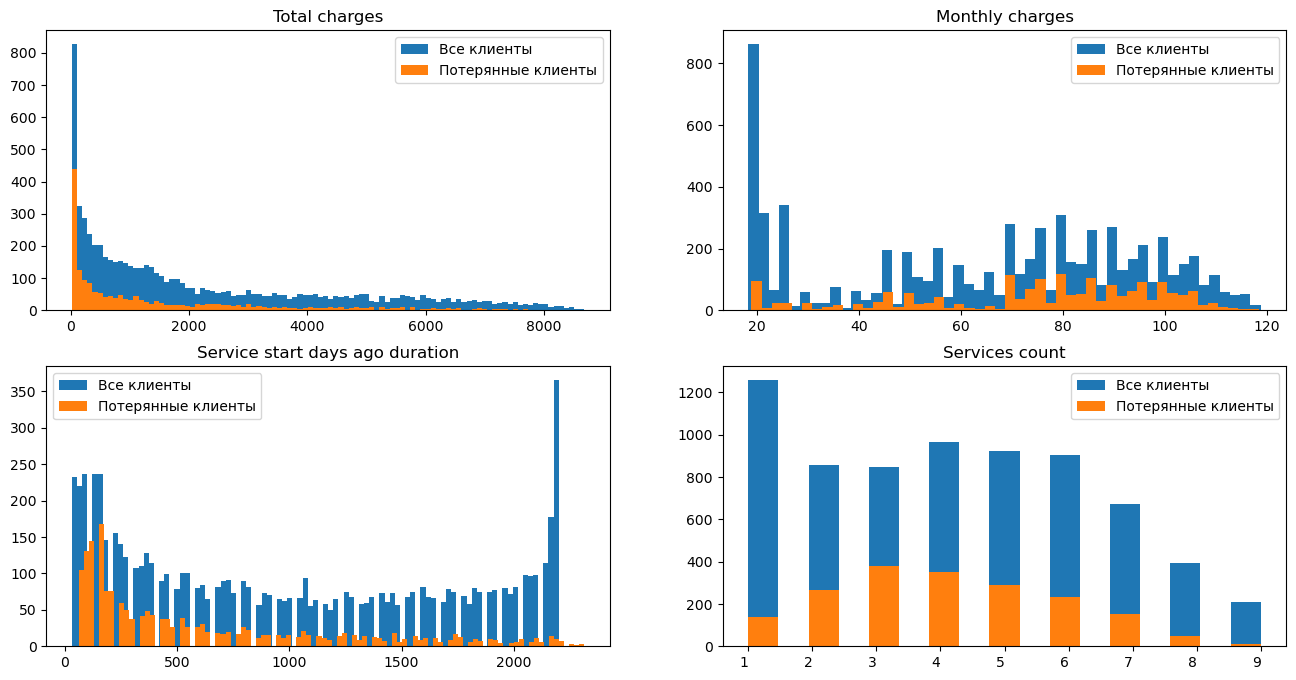

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

plt.setp(plt.xticks()[1], rotation=0, ha='right')

ax[0,1].hist(df['monthly_charges'], bins=50)
ax[0,1].hist(df[df['target'] == 1]['monthly_charges'], bins=50)
ax[0,1].set_title('Monthly charges')

ax[0,0].hist(df['total_charges'], bins=100)
ax[0,0].hist(df[df['target'] == 1]['total_charges'], bins=100)
ax[0,0].set_title('Total charges')

ax[1,0].hist(df['service_start_days_ago_duration'], bins = 100)
ax[1,0].hist(df[df['target'] == 1]['service_start_days_ago_duration'], bins = 100)
ax[1,0].set_title('Service start days ago duration')

ax[1,1].hist(df['services_count'],bins=17)
ax[1,1].hist(df[df['target'] == 1]['services_count'],bins=17)
ax[1,1].set_title('Services count')

for i in range(2):
    for j in range(2):
        ax[i,j].legend(['Все клиенты', 'Потерянные клиенты'])

**Вывод:**  
Распределение `Total charges` выглядит нормально.  
По графику визуально можно определить, что гипотеза с ежемесячный платой `Monthly charges` (чем выше ежемесячная плата, тем выше вероятность, что клиент уйдет) подтверждается.  
Распределение `Service start days ago duration` показывает, что чем раньше клиент заключил договор с компанией, тем ниже шанс, что он разорвет договор.
Распределение `Services count` показывает, что клиенты пользующиеся 1, 6, 7, 8 или 9 услугами компании менее склонны к разрыву договора.

#### Оценим количество заключенных и разорванных договоров по годам

In [38]:
customer_by_year = pd.to_datetime(df_orig['begin_date'], format='%Y-%m-%d %H:%M:%S').dt.year
customer_by_year = customer_by_year.value_counts().reset_index().rename(columns = {"index" : "год","begin_date" : "заключенные договора"}).sort_values(by='год')

In [39]:
leave_by_year = df_orig['end_date'].copy()
leave_by_year = leave_by_year[leave_by_year != 'No']
leave_by_year = pd.to_datetime(leave_by_year, format='%Y-%m-%d %H:%M:%S').dt.year
leave_by_year = leave_by_year.value_counts().reset_index().rename(columns = {"index" : "год","end_date" : "разорванные договора"}).sort_values(by='год')

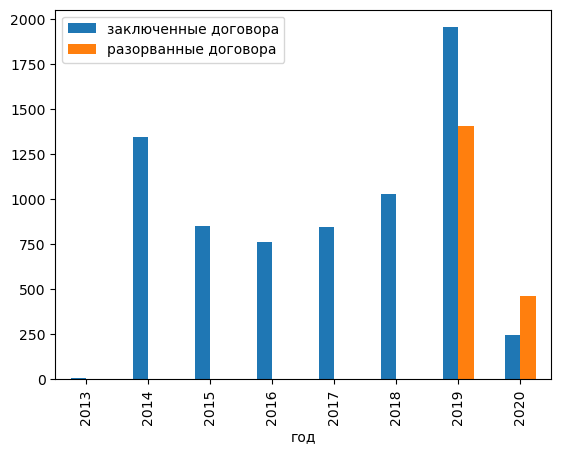

In [40]:
by_year = customer_by_year.merge(leave_by_year, on = 'год', how = 'left')
by_year = by_year.fillna('0').astype('int')
by_year.plot(x="год", y=["заключенные договора","разорванные договора"], kind="bar");

Оценим первый расторгнутый контракт: найдем дату этого контракта, количество таких контрактов и выведим 10 из них случайным образом:

In [41]:
display(
    df_orig[(df_orig['end_date'] == df_orig['end_date'].min())].sample(10),
    df_orig['end_date'].min(),
    df_orig[(df_orig['end_date'] == df_orig['end_date'].min())].count().max()
)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
0125-LZQXK,2018-07-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,101.35,1553.95,Fiber optic,No,No,Yes,Yes,Yes,Yes,Male,0,No,No,No
8305-VHZBZ,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,20.20,20.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,No,No,No
2634-HCZGT,2015-05-01,2019-10-01 00:00:00,One year,Yes,Electronic check,60.05,3229.65,DSL,Yes,No,No,Yes,No,No,Male,1,Yes,No,Yes
9940-RHLFB,2019-09-01,2019-10-01 00:00:00,Month-to-month,No,Electronic check,75.30,75.3,Fiber optic,No,No,Yes,No,No,No,Female,0,No,No,No
5747-PMBSQ,2018-12-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,92.50,934.1,Fiber optic,No,Yes,Yes,Yes,Yes,No,Male,1,Yes,No,No
1571-SAVHK,2018-10-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,99.95,1132.75,Fiber optic,No,No,No,Yes,Yes,Yes,Male,0,No,No,Yes
9101-BWFSS,2015-08-01,2019-10-01 00:00:00,One year,No,Electronic check,108.55,5610.7,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Female,0,Yes,No,Yes
5233-GEEAX,2019-02-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,29.40,221.9,DSL,No,No,Yes,No,No,No,Male,1,No,No,NaN
1626-ERCMM,2018-02-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,94.55,1899.65,Fiber optic,No,No,No,No,Yes,Yes,Male,1,Yes,No,Yes


'2019-10-01 00:00:00'

458

Мы видим, что первый разорванный договор относится к октябрю 2019 года, таких контрактов 458. При этом мы знаем, что всего за 4 месяца было расторгнуто 1869 контрактов, это примерно по 465 в месяц. Визуально такой график выглядит как аномалия данных.

In [42]:
df_orig[(df_orig['end_date']=='No') & (df_orig['begin_date']<'2019-10-01 00:00:00')]

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Fiber optic,No,Yes,No,No,Yes,No,Male,0,No,Yes,Yes
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,DSL,Yes,No,No,No,No,No,Female,0,No,No,NaN
6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,DSL,Yes,Yes,No,No,No,No,Male,0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,0,No,No,No
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes


### Проверяем корреляцию и мультиколлинеарность признаков

#### Проверим корреляцию целевого признака с помощью коэф Пирсона

In [43]:
df.corr()

,target,monthly_charges,total_charges,service_start_days_ago_duration,services_count
target,1.000000,0.192858,-0.199484,-0.313547,-0.019644
monthly_charges,0.192858,1.000000,0.651065,0.259819,0.851408
total_charges,-0.199484,0.651065,1.000000,0.829135,0.777388
service_start_days_ago_duration,-0.313547,0.259819,0.829135,1.000000,0.480900
services_count,-0.019644,0.851408,0.777388,0.480900,1.000000


**Вывод:** коэф Пирсона показывает отсутствие корреляции целевого признака с другими признаками.

<div style="border:solid #004581 2px; background-color:#f1f1f0; color:#004581">
<div style="padding: 10px">
<font size="5"><b>Комментарий студента #1</b></font>
<p>C VIF что-то пошло не так. Я не стал углубляться и взял готовый вариант - phik. Штука очень мне понравилась, куча встроенных инструментов для анализа.
</p>
</div>
</div>

In [44]:
# df_vif = df[df.select_dtypes(include=['int']).columns]

# vif = pd.DataFrame()
# vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
# vif['variable'] = df_vif.columns
# vif

#### Построим хитмап матрицы мультиколлинеарности признаков с помощью phik

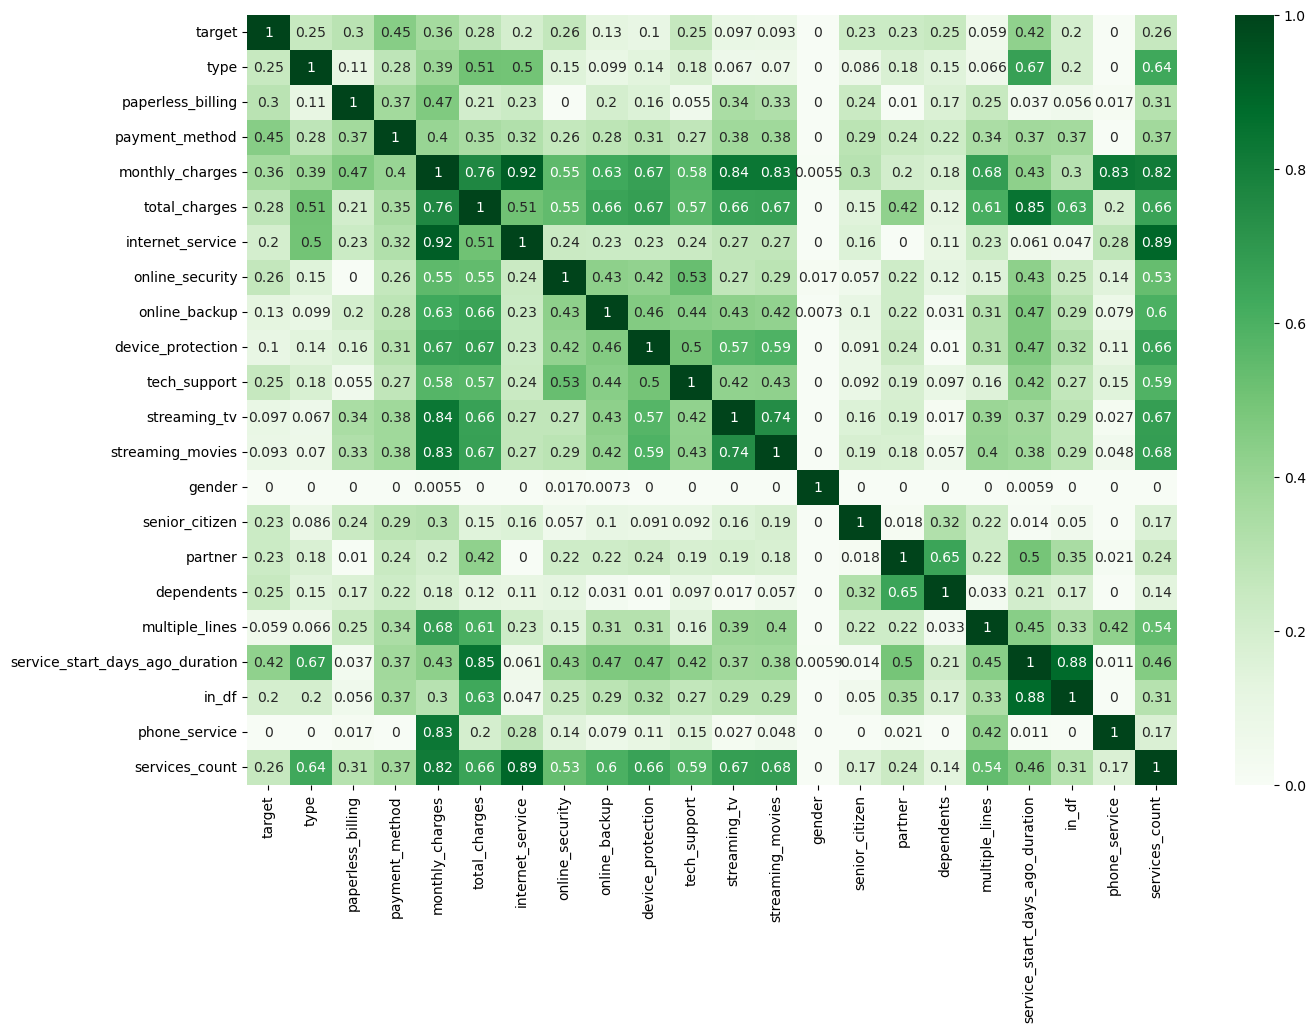

In [45]:
interval_cols = [
    'target'
    ,'monthly_charges'
    ,'total_charges'
    ,'services_count'
    ,'service_start_days_ago_duration'
#    'service_in_days_duration'
]
plt.figure (figsize=(15,10))
sns.heatmap (df.phik_matrix(interval_cols=interval_cols), annot=True, cmap='Greens');

На основе исследовательского анализа распределения категориальных признаков и матрицы мультиколлинеарности, удалим следующие столбцы: `gender`, `senior_citizen`, `dependents`, `phone_service` и `partner`.

In [46]:
df_report = df.copy()

drop_col = [
    'gender'
     ,'senior_citizen'
     ,'dependents'
     ,'phone_service'
    ,'partner'
#    ,'total_charges'
#    ,'monthly_charges'
#    ,'streaming_tv'
#    ,'streaming_movies'
#    ,'multiple_lines'
]
df = df.drop(drop_col, axis = 1)

Построим новую матрицу:

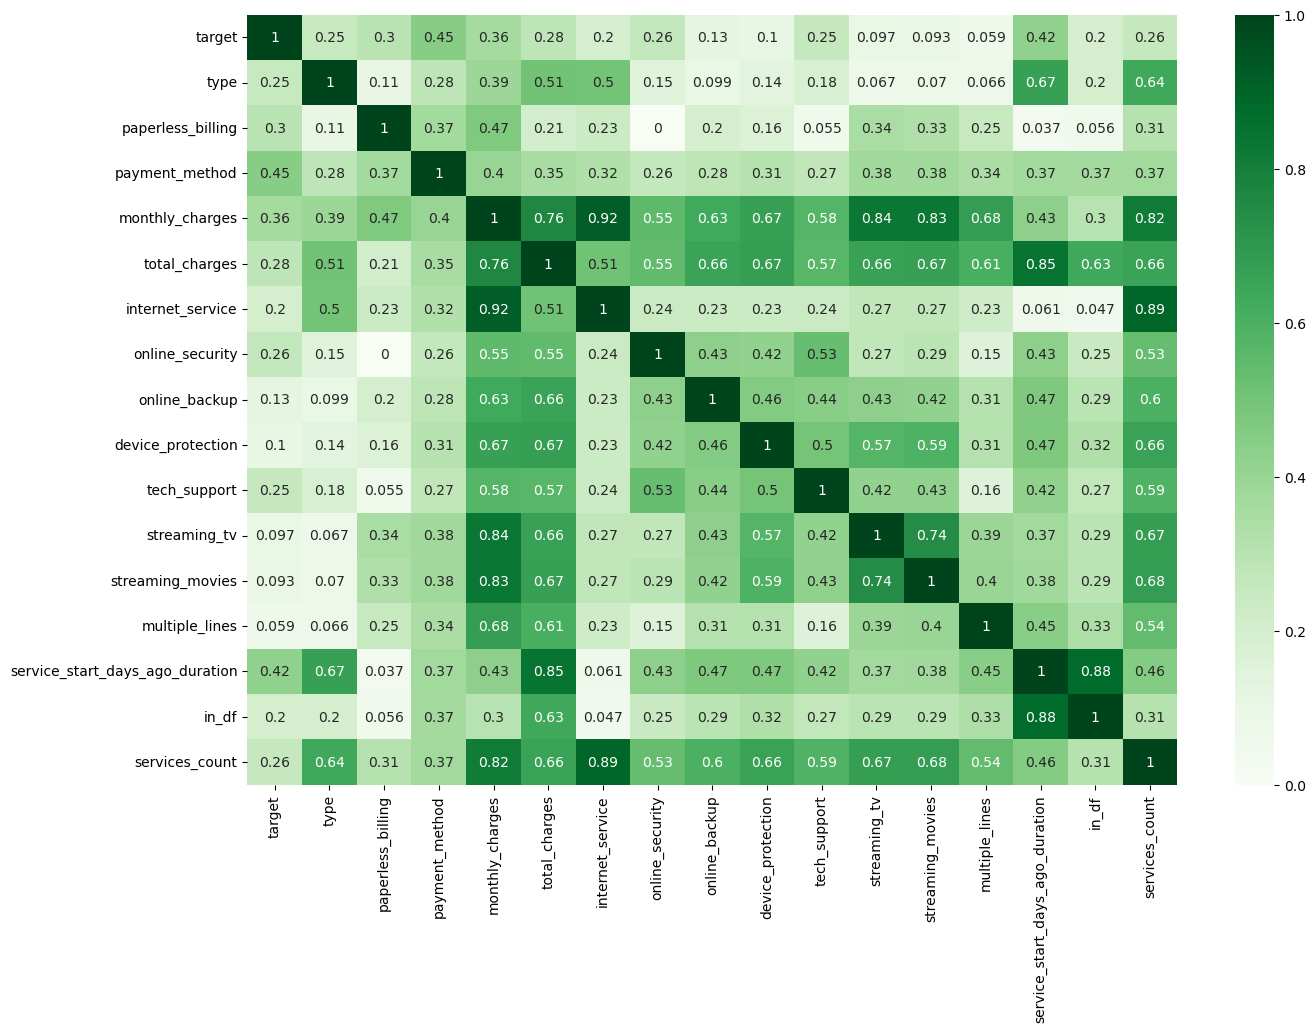

In [47]:
interval_cols = [
    'target'
    ,'monthly_charges'
    ,'total_charges'
    ,'services_count'
    ,'service_start_days_ago_duration'
#    ,'service_in_days_duration'
]
plt.figure (figsize=(15,10))
sns.heatmap (df.phik_matrix(interval_cols=interval_cols), annot=True, cmap='Greens');

### Выделяем признаки

In [48]:
target = df['target'].astype('int')
features = df.drop('target', axis=1)
display(target.shape, features.shape)

(7032,)

(7032, 16)

#### Делим данные на выборки

In [50]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RS, stratify=target)

#### Масштабируем численные признаки

Для линейных моделей рекомендуется масштабировать численные признаки:

In [51]:
num_cols = [
    'monthly_charges'
    ,'total_charges'
    ,'service_start_days_ago_duration'
    ,'services_count'
#    ,'service_in_days_duration'
]

# scaler = StandardScaler()
# scaler.fit(features_train[num_cols])
# features_train[num_cols] = scaler.transform(features_train[num_cols])
# features_test[num_cols] = scaler.transform(features_test[num_cols])

#### Кодируем категориальные признаки

In [52]:
df.columns

Index(['target', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines',
       'service_start_days_ago_duration', 'in_df', 'services_count'],
      dtype='object')

In [53]:
cat_cols = [
    'type'
    ,'in_df'
    ,'paperless_billing'
    ,'payment_method'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection'
    ,'tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'multiple_lines'
#    ,'begin_year'
#    ,'senior_citizen'
#    ,'dependents'
#    ,'phone_service'
#    ,'partner'
]

# transformer = make_column_transformer(
#     (OneHotEncoder(drop='first', handle_unknown='error', sparse=False),
#      cat_cols),
#     remainder='passthrough')

# transformed  = transformer.fit_transform(features_train)
# transformed_train  = transformer.transform(features_train)
# transformed_test  = transformer.transform(features_test)

# features_train_ohe = pd.DataFrame(
#     transformed_train,
#     columns=transformer.get_feature_names_out()
# )

# features_test_ohe = pd.DataFrame(
#     transformed_test, 
#     columns=transformer.get_feature_names_out()
# )

#### Оверсэмплинг SMOTE.

Для устранения дисбалланса классов, используем алгоритм предварительной обработки данных SMOTE:

In [54]:
#oversample = SMOTENC(random_state=RS, categorical_features=cat_cols)
#X, y = oversample.fit_resample(features_train, target_train)

X = features_train
y = target_train

### Вывод

Мы визуально оценили распределение признаков. Проверили корреляцию и мультиколлинеарность признаков. Удалили ненужные признаки. Поделили данные на выборки. Смасштабировали численные и закодировали категориальные признаки. Для устранения дисбалланса провели SMOTE овэрсэмплинг.

## Обучаем модели

### Подготовим сводную таблицу

Подготовим сводную таблицу, куда будем заносить результаты обучения моделей:

In [55]:
models = pd.DataFrame(columns =  ['model_name', 'model_var', 'mean_fit_time', 'roc_auc_train'])
display(models)

,model_name,model_var,mean_fit_time,roc_auc_train


Напишим функцию, которая будет сохранять результаты обучения модели в итоговую таблицу.

In [56]:
def models_result (model_name, model_var, mean_fit_time, roc_auc, models):
    result = [model_name, model_var, mean_fit_time, roc_auc]
    rows = [pd.Series(result, index = models.columns)]
    models = models.append(rows,ignore_index=True)
    return(models)

### Logistic Regression

In [57]:
%%time
    # инициация модели
    model_lr = LogisticRegression()
    
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())]) 
    
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)    
    # параметры
    params_lr = {
         'model__random_state': [RS]
         ,'model__C': np.arange(0.001, 10, 0.001)
#        ,'model__C': [9]
        ,'model__class_weight': [None, 'balanced']
#        ,'model__class_weight': ['balanced']        
        ,'model__fit_intercept': [True, False]
#        ,'model__fit_intercept': [False]
        ,'model__l1_ratio': [None]
        ,'model__max_iter': range(1, 1001, 50)
#        ,'model__max_iter': [301]
        ,'model__n_jobs': [-1]
        ,'model__penalty': ['l2']
        ,'model__solver': ['lbfgs', 'saga']
#        ,'model__solver': ['saga']
        ,'model__tol': [0.0001, 0.001, 0.01, 0.1]
#        ,'model__tol': [0.001]
    }
    
    # пайплайн
    pipe_lr = Pipeline(steps = [
        ("preproc", preprocessor),
#        ("smote", oversample),
        ("model", model_lr)
        ])
    
    # подбор параметров
    rscv_lr = RandomizedSearchCV(
        estimator = pipe_lr,
        param_distributions = params_lr,
        cv = CV,
        n_jobs = -1,
        scoring = 'roc_auc',
        random_state = RS)
    
    # обучение модели
    rscv_lr.fit(X, y)
    
    # формирование таблицы результатов
    model_name = 'Logistic Regression'
    model_var = rscv_lr.best_params_
    mean_fit_time = round(rscv_lr.cv_results_['mean_fit_time'].mean(),1)
    roc_auc = round(rscv_lr.best_score_,3)
    models = models_result(model_name, model_var, mean_fit_time, roc_auc, models)

    # вывод результатов 
    display(
        rscv_lr.best_estimator_,
        models.sort_values('roc_auc_train', ascending=False)
    )

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'service_start_days_ago_duration',
                                                   'services_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type', 'in_df',
                                                   'paperless_billing',
                                                   'payment_method',
                                                   'internet_service',
                            

,model_name,model_var,mean_fit_time,roc_auc_train
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836


Wall time: 2.48 s


### Random Forest

In [58]:
%%time

    model_rf = RandomForestClassifier()
    
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())]) 
    
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", OrdinalEncoder(handle_unknown='error'), cat_cols)
    ]
)    
    
    params_rf = {
         'model__random_state': [RS]
        ,'model__ccp_alpha': [0, 0.5, 1, 2]
#        ,'model__ccp_alpha': [0]
        ,'model__class_weight': [None, 'balanced', 'balanced_subsample']
#        ,'model__class_weight': ['balanced']
        ,'model__criterion': ['gini', 'entropy']
#        ,'model__criterion': ['entropy']
        ,'model__max_depth': range(1, 101, 10)
#        ,'model__max_depth': [41]
        ,'model__max_features': range(1, 10, 1)
#        ,'model__max_features': [6]
        ,'model__min_samples_leaf': range(1, 10, 1)
#        ,'model__min_samples_leaf': [5]
        ,'model__min_samples_split': range(2, 10, 1)
#        ,'model__min_samples_split': [9]
        ,'model__n_estimators': range(1, 501, 100)
#        ,'model__n_estimators': [101]
        ,'model__n_jobs': [-1]
    }
    
    pipe_rf = Pipeline([
        ("preproc", preprocessor),
#        ("smote", oversample),
        ('model', model_rf)
    ])

    rscv_rf = RandomizedSearchCV(
        estimator=pipe_rf,
        param_distributions=params_rf,
        cv=CV,
        n_jobs=-1,
        scoring='roc_auc',
        random_state=RS)
    
    rscv_rf.fit(X, y)

    model_name = 'Random Forest'
    model_var = rscv_rf.best_params_
    mean_fit_time = round(rscv_rf.cv_results_['mean_fit_time'].mean(),1)
    roc_auc = round(rscv_rf.best_score_,3)
    models = models_result(model_name, model_var, mean_fit_time, roc_auc, models)
    
    display(
        rscv_rf.best_estimator_,
        models.sort_values('roc_auc_train', ascending=False)
    )

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'service_start_days_ago_duration',
                                                   'services_count']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type', 'in_df',
                                                   'paperless_billing',
                                                   'payment_method',
                                                   'internet_service',
                                                   'online_security',
                              

,model_name,model_var,mean_fit_time,roc_auc_train
1,Random Forest,"{'model__random_state': 130323, 'model__n_jobs...",0.9,0.894
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836


Wall time: 4.99 s


### LightGBM

Для модели LightGBM нужно перевести наши категориальные признаки в тип данных `category`:

In [60]:
%%time

    model_lgbm = LGBMClassifier()
    
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())]) 
    
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", OrdinalEncoder(handle_unknown='error'), cat_cols)
    ]
    )       
    
    params_lgbm = {
         'model__random_state': [RS]
#        ,'model__boosting_type': ['gbdt', 'dart', 'goss']
        ,'model__boosting_type': ['dart']        
#        ,'model__class_weight': [None, 'balanced']
        ,'model__class_weight': ['balanced']
#        ,'model__importance_type': ['split', 'gain']
        ,'model__importance_type': ['gain']
#        ,'model__learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
        ,'model__learning_rate': [0.5]
#        ,'model__max_depth': range(1,51,2)
        ,'model__max_depth': [29]
#        ,'model__n_estimators': range(100, 500, 50)
        ,'model__n_estimators': [450]
        ,'model__n_jobs': [-1]
#        ,'model__subsample_for_bin': [10000, 50000, 100000]
        ,'model__subsample_for_bin': [10000]
#        ,'model__num_leaves': range(2, 20, 2)
        ,'model__num_leaves': [14]
    }
    
    pipe_lgbm = Pipeline([
        ("preproc", preprocessor),
#        ("smote", oversample),
        ('model', model_lgbm)
    ])

    rscv_lgbm = RandomizedSearchCV(
        estimator = pipe_lgbm,
        param_distributions = params_lgbm,
        cv = CV,
        n_jobs = -1,
        scoring = 'roc_auc',
        random_state = RS)

    rscv_lgbm.fit(X, y)
    
    model_name = 'LightGBM'
    model_var = rscv_lgbm.best_params_
    mean_fit_time = round(rscv_lgbm.cv_results_['mean_fit_time'].mean(),1)
    roc_auc = round(rscv_lgbm.best_score_,3)
    models = models_result(model_name, model_var, mean_fit_time, roc_auc, models)

    display(
        rscv_lgbm.best_estimator_,
        models.sort_values('roc_auc_train', ascending=False)
    )

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'service_start_days_ago_duration',
                                                   'services_count']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type', 'in_df',
                                                   'paperless_billing',
                                                   'payment_method',
                                                   'internet_service',
                                                   'online_security',
                              

,model_name,model_var,mean_fit_time,roc_auc_train
2,LightGBM,"{'model__subsample_for_bin': 10000, 'model__ra...",1.5,0.936
1,Random Forest,"{'model__random_state': 130323, 'model__n_jobs...",0.9,0.894
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836


Wall time: 3.18 s


### CatBoost

In [61]:
%%time

    model_cb = CatBoostClassifier()
    
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())]) 
    
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", OrdinalEncoder(handle_unknown='error'), cat_cols),
#        ("cbe", ce.cat_boost.CatBoostEncoder(), num_cols + cat_cols)
    ]
    )       
    
    params_cb = {
         'model__random_state': [RS]
#        ,'model__max_depth': range(1, 16, 1)
        ,'model__max_depth': [2]
#        ,'model__n_estimators': range(1, 501, 25)
        ,'model__n_estimators': [426]
        ,'model__learning_rate': [0.5]
#        ,'model__l2_leaf_reg': range(1, 11, 2)
        ,'model__l2_leaf_reg': [7]
#        ,'model__loss_function': ['Logloss','CrossEntropy']
        ,'model__loss_function': ['Logloss']
        ,'model__eval_metric': ['AUC']
        ,'model__metric_period': [100]
#        ,'model__silent': [True]
    }
    
    pipe_cb = Pipeline(steps=[
        ("preproc", preprocessor),
#        ("smote", oversample),
        ('model', model_cb)
    ])

    rscv_cb = RandomizedSearchCV(
        estimator=pipe_cb,
        param_distributions=params_cb,
        cv=CV,
        n_jobs=-1,
        scoring='roc_auc',
        random_state=RS)

    rscv_cb.fit(X, y)
    
    model_name = 'CatBoost'
    model_var = rscv_cb.best_params_
    mean_fit_time = round(rscv_cb.cv_results_['mean_fit_time'].mean(),1)
    roc_auc = round(rscv_cb.best_score_,3)
    models = models_result(model_name, model_var, mean_fit_time, roc_auc, models)

    display(
        rscv_cb.best_params_,
        rscv_cb.best_estimator_,
        models.sort_values('roc_auc_train', ascending=False)
    )

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


0:	total: 134ms	remaining: 57.1s
100:	total: 295ms	remaining: 949ms
200:	total: 461ms	remaining: 516ms
300:	total: 626ms	remaining: 260ms
400:	total: 791ms	remaining: 49.3ms
425:	total: 832ms	remaining: 0us


{'model__random_state': 130323,
 'model__n_estimators': 426,
 'model__metric_period': 100,
 'model__max_depth': 2,
 'model__loss_function': 'Logloss',
 'model__learning_rate': 0.5,
 'model__l2_leaf_reg': 7,
 'model__eval_metric': 'AUC'}

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'service_start_days_ago_duration',
                                                   'services_count']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['type', 'in_df',
                                                   'paperless_billing',
                                                   'payment_method',
                                                   'internet_service',
                                                   'online_security',
                              

,model_name,model_var,mean_fit_time,roc_auc_train
3,CatBoost,"{'model__random_state': 130323, 'model__n_esti...",1.1,0.946
2,LightGBM,"{'model__subsample_for_bin': 10000, 'model__ra...",1.5,0.936
1,Random Forest,"{'model__random_state': 130323, 'model__n_jobs...",0.9,0.894
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836


Wall time: 2.66 s


### Support Vector Machine

In [62]:
%%time

    model_svm = svm.SVC()
    
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())]) 
    
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
    )       
    
    params_svm = {
        'model__random_state': [RS]
#        ,'model__C': [1,2,4]
        ,'model__C': [2]
#        ,'model__degree': [1,5,10]
        ,'model__degree': [1]
#        ,'model__gamma': [1,5,10]
        ,'model__gamma': [5]
#        ,'model__class_weight': [None, 'balanced']
        ,'model__class_weight': ['balanced']
        ,'model__verbose': [1]
#        ,'model__max_iter': [1000, 50000, 100000]
        ,'model__max_iter': [50000]
#        ,'model__kernel': ['linear','poly', 'rbf', 'sigmoid']
        ,'model__kernel': ['poly']
        ,'model__probability': [True]
    }
    
    pipe_svm = Pipeline([
        ("preproc", preprocessor),
#        ("smote", oversample),
        ('model', model_svm)
    ])

    rscv_svm = RandomizedSearchCV(
        estimator=pipe_svm,
        param_distributions=params_svm,
        cv=CV,
        n_jobs=-1,
        scoring='roc_auc',
        random_state=RS)

    rscv_svm.fit(X, y)

    model_name = 'Support Vector Machine'
    model_var = rscv_svm.best_params_
    mean_fit_time = round(rscv_svm.cv_results_['mean_fit_time'].mean(),1)
    roc_auc = round(rscv_svm.best_score_,3)
    models = models_result(model_name, model_var, mean_fit_time, roc_auc, models)

    display(
        rscv_svm.best_estimator_,
        models.sort_values('roc_auc_train', ascending=False)
    )

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


[LibSVM]

Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'service_start_days_ago_duration',
                                                   'services_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type', 'in_df',
                                                   'paperless_billing',
                                                   'payment_method',
                                                   'internet_service',
                            

,model_name,model_var,mean_fit_time,roc_auc_train
3,CatBoost,"{'model__random_state': 130323, 'model__n_esti...",1.1,0.946
2,LightGBM,"{'model__subsample_for_bin': 10000, 'model__ra...",1.5,0.936
1,Random Forest,"{'model__random_state': 130323, 'model__n_jobs...",0.9,0.894
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836
4,Support Vector Machine,"{'model__verbose': 1, 'model__random_state': 1...",7.4,0.819


Wall time: 17.3 s


### Baseline-модель

In [63]:
model_dc = DummyClassifier(strategy="most_frequent", random_state=RS).fit(X,y)

probabilities_valid = model_dc.predict_proba(X)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(y, probabilities_one_valid)

model_name = 'Dummy'
model_var = np.nan
mean_fit_time = np.nan
roc_auc = round(auc_roc,3)
models = models_result(model_name, model_var, mean_fit_time, roc_auc, models)

display(
    models.sort_values('roc_auc_train', ascending=False)
)

,model_name,model_var,mean_fit_time,roc_auc_train
3,CatBoost,"{'model__random_state': 130323, 'model__n_esti...",1.1,0.946
2,LightGBM,"{'model__subsample_for_bin': 10000, 'model__ra...",1.5,0.936
1,Random Forest,"{'model__random_state': 130323, 'model__n_jobs...",0.9,0.894
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836
4,Support Vector Machine,"{'model__verbose': 1, 'model__random_state': 1...",7.4,0.819
5,Dummy,NaN,NaN,0.500


**Вывод:** Мы обучили 5 моделей и проверили их на адекватность с помощью Baseline-модели. CatBoost показала лучшие метрики на тренировочной выборке, ее мы и будем проверять на тестовой выборке.

## Проверка лучшей модели на тестовой выборке

### CatBoost

Модель с лучшими гиперпараметрами:
<catboost.core.CatBoostClassifier object at 0x00000174C0164910> {'model__random_state': 130323, 'model__n_estimators': 426, 'model__metric_period': 100, 'model__max_depth': 2, 'model__loss_function': 'Logloss', 'model__learning_rate': 0.5, 'model__l2_leaf_reg': 7, 'model__eval_metric': 'AUC'}

ROC-AUC на тренировочной выборке: 0.955
Accuracy на тренировочной выборке: 0.910


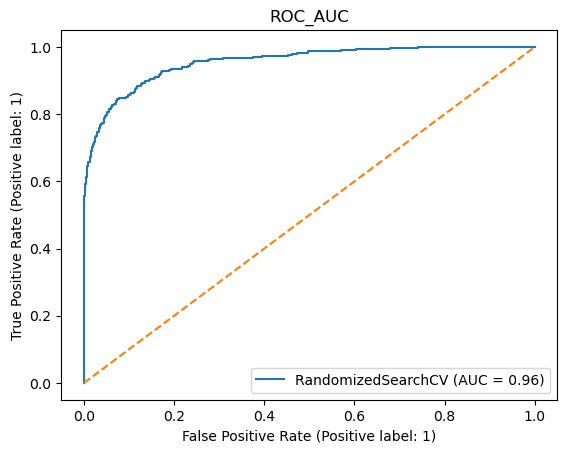

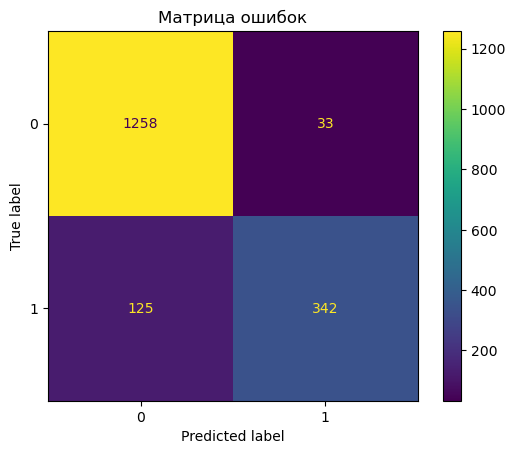

Wall time: 276 ms


In [64]:
%%time

    probabilities_valid = rscv_cb.best_estimator_.predict_proba(features_test)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc_test = roc_auc_score(target_test, probabilities_one_valid)
    accuracy_test = rscv_cb.best_estimator_.score(features_test, target_test)
    fpr_t, tpr_t, thresholds_t = roc_curve(target_test, probabilities_one_valid)
    
    print('Модель с лучшими гиперпараметрами:')
    print(model_cb, rscv_cb.best_params_)
    print('')
    print('ROC-AUC на тренировочной выборке: {:.3f}'.format(auc_roc_test))
    print('Accuracy на тренировочной выборке: {:.3f}'.format(accuracy_test))
    
    plot_roc_curve(rscv_cb, features_test, target_test)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC_AUC')
    plt.show()
    
    plot_confusion_matrix(rscv_cb, features_test, target_test)
    plt.title('Матрица ошибок')
    plt.show()

В целом матрица ошибок соответствует поведению нашей модели:
 - большинство пользователей продолжает пользоваться услугами компании, некоторые уходят. модель достаточно хорошо их определяет.
 - модель предсказывает, что пользователь останется, а он на самом деле уходит (False Negative), т.к. наша модель предвзято относится к пользователям, заключившим контракт до 2019-10-01.

Важность признаков получилось вытащить вот так:

In [65]:
feature_importance = rscv_cb.best_estimator_.named_steps['model'].get_feature_importance()
feature_importance

array([1.20942312e+01, 3.51341358e+01, 3.09149339e+01, 1.49803474e+00,
       1.03838656e+01, 2.77980608e-01, 7.75940328e-01, 1.09817198e+00,
       5.81329752e+00, 3.82700599e-01, 1.22053201e-01, 7.96896915e-04,
       3.49109508e-01, 3.81765666e-01, 4.10416901e-01, 3.62565605e-01])

Названия категориальных столбцов вот так:

In [66]:
cat_col_names = rscv_cb.best_estimator_.named_steps['preproc'].transformers_[1][2]
cat_col_names

['type',
 'in_df',
 'paperless_billing',
 'payment_method',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

Названия числовых столбцов вот так:

In [67]:
num_col_names = rscv_cb.best_estimator_.named_steps['preproc'].transformers_[0][2]
num_col_names

['monthly_charges',
 'total_charges',
 'service_start_days_ago_duration',
 'services_count']

Теперь визуализируем результат:

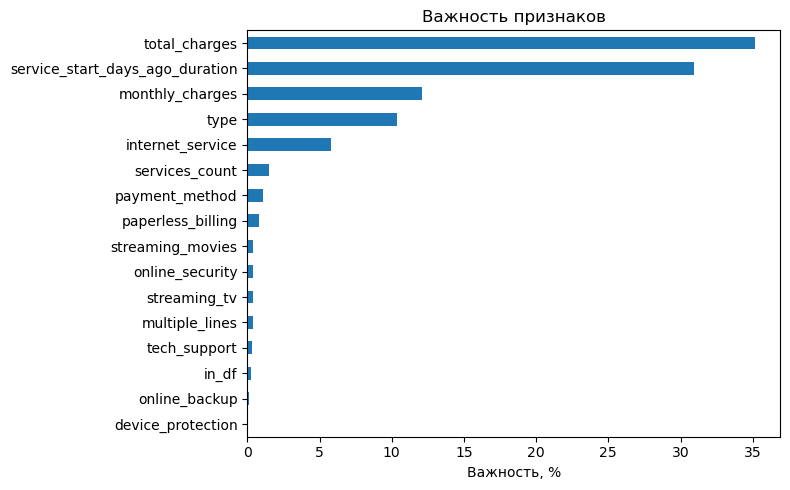

In [68]:
imp = pd.Series(feature_importance, num_col_names + cat_col_names).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8,5))
imp.plot.barh(ax=ax)
ax.set_title("Важность признаков")
ax.set_xlabel('Важность, %')
fig.tight_layout()

In [69]:
imp.sort_values(ascending=False).head(5)

total_charges                      35.134136
service_start_days_ago_duration    30.914934
monthly_charges                    12.094231
type                               10.383866
internet_service                    5.813298
dtype: float64

**Вывод:** модель CatBoost показала следующие результаты на тестовой выборке: ROC-AUC - 0.955, Accuracy - 0.910. матрица ошибок выглядит нормально и отражает небольшую предвзятость нашей модели. Ключевыми признаками оказались: `Total charges`, `Service start days ago duration`, `Monthly charges`, `Type` и `Internet service`.

## Общий вывод

Мы загрузили и провели первичный анализ данных. Данные состоят из 4-х датасетов. Столбец customerID (Код клиента) уникален и не повторяется дважды, поэтому мы объединили 4 таблицы используя столбец customerID в качестве индекса. Получившийся датафрейм состоит из 7043 строк и 19 столбцов.

Во время предобработки данных мы обработали пропуски и пустые значения. Привели данные к нужному типу для исследовательского анализа, создали несколько новых столбцов для формирования признаков и удалили ненужные.

Во время исследовательского анализа данных выяснилось, что в целевом признаке присутствует дисбалланс. Так же мы оценили распределение остальных признаков: выделили более и менее важные среди них. Оценили количество заключенных и разорванных договоров по годам, что позволило выявить аномалию данных.

Мы проверили признаки на корреляцию и мультиколлинеарность. Удалили несущественные признаки. Поделили данные на тестовую и тренировочную выборки.

Мы обучили 5 моделей с помощью пайплайна и проверили их на адекватность с помощью Baseline-модели. Модель CatBoost показала лучшую метрику на тренировочной выборке:

In [70]:
display(models.sort_values('roc_auc_train', ascending=False))

,model_name,model_var,mean_fit_time,roc_auc_train
3,CatBoost,"{'model__random_state': 130323, 'model__n_esti...",1.1,0.946
2,LightGBM,"{'model__subsample_for_bin': 10000, 'model__ra...",1.5,0.936
1,Random Forest,"{'model__random_state': 130323, 'model__n_jobs...",0.9,0.894
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836
4,Support Vector Machine,"{'model__verbose': 1, 'model__random_state': 1...",7.4,0.819
5,Dummy,NaN,NaN,0.500


На тестовой выборке модель CatBoost показала следующие результаты: ROC-AUC - 0.955, Accuracy - 0.910. Матрица ошибок выглядит нормально и отражает небольшую предвзятость нашей модели. Ключевыми признаками оказались: `Total charges` и `Service start days ago duration`.  
Модель удовлетворяет условию, поставленному заказчиком и ее можно рекомендовать к использованию.

# Третья часть работы - Отчет

**Прогнозирование оттока клиентов.**
  
В этом проекте мы стремимся определить, какие клиенты телекомуникационной компании гововы покинуть ее, а какие готовы остаться. Для этого мы оценим данные клиентов, собранные компанией, подберем модель машинного обучения, обучим ее на этих данных, и выделим ключевые признаки, по которым можно будет спрогнозировать поведение клиентов. 

## Введение

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.  
  
**Основная задача:** В течении 2-х недель разработать модель, которая могла бы прогнозировать отток клиентов (решать задачу классификации клиентов на потенциально уходящих и на отсающихся). Ключевая метрика по настоянию заказчика - roc-auc. Дополнительная метрика, более наглядная для коллег из бизнеса, accuracy.  

Для решения данной задачи мы разработали следующий план действий:  
  
**1) Импорт библиотек и загрузка данных**
- Первичный анализ данных  

**2) Предобработка и исследовательский анализ данных**
- Предобработка
- Создание новых признаков
- Исследовательский анализ данных / визуализация
- Кодирование категориальных признаков и масштабирование данных
- Подготовка обучающей и тестовой выборок
- Вывод  

**3) Обучение модели**
- Подготовка таблицы с результатами
- Logistic Regression
- Random Forest
- LightGBM
- CatBoost
- Support Vector Machine
- Проверка моделей на адекватность
- Проверка лучшей модели на тестовой выборке
- Вывод  

**4) Общий Вывод**  

**5) Отчет по исследовательской работе**  


По условию срез базы данных был взят на 01.02.2020, а итоговая метрика roc-auc должна быть выше 85%.

## Анализ и предобработка данных

Телекоммуникационная компания предоставила нам 4 набора данных:  
- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.  
  
Столбец `customer_id` является общим для всех таблиц, а значения уникальными (ни разу не повторяются), поэтому мы объединим эти таблицы в одну по этому столбцу. Объединенная таблица насчитывает 7043 строк и 19 столбцов:
* `customer_id` - код клиента
* `begin_date` - дата заключения договора обслуживания
* `end_date` - дата разрыва договора обслуживания
* `type` - тип договора: двухлетний (Two year), однолетний (One year) или ежемесячный (Month-to-month)
* `paperless_billing` - выставление счета
* `payment_method` - способ оплаты
* `monthly_charges` - среднемесячные траты на услуги
* `total_charges` - общие траты на услуги
* `internet_service` - тип подключения интернета: через телефонную линию (DSL) или оптоволоконный кабель (Fiber optic)
* `online_security` - услуга блокировки небезопасных сайтов
* `online_backup` - услуга облачного хранилища файлов
* `device_protection` - услуга антивирус 
* `tech_support` - услуга выделенной линии технической поддержки
* `streaming_tv` - услуга стримингового телевидения
* `streaming_movies` - услуга каталога фильмов
* `gender` - пол клиента
* `senior_citizen` - пенсионный статус клиента
* `partner` - супружеский статус клиента
* `dependents` - статус наличия иждивенцев
* `multiple_lines` - услуга парролельных линий

Первичный анализ данных позволил нам выделить целевой признак - столбец `end_date`, определить наличие пропусков и аномалий в данных.  

Пропуски в данных возникли потому, что информацию о подключенных услугах разных типов компания хранит в разных датафреймах, и, если пользователь не пользуется ни одной услугой из представленной группы, то компания не вносит его в этот датафрейм. Объединив датафреймы по клиенту мы получили пропуски в столбцах тех услуг, которыми клиент не пользуется. В будущем, такие пропуски мы заменим на значения `No`.  

Так же мы обнаружили 11 аномальных значений с пустыми значениями в столбце `total_charges`, это оказались клиенты, которые только заключили договор с компанией на момент среза базы данных (01.02.2020). Эти пропуски мы удалили, т.к. их недостаточно много, чтобы они могли повлиять на ход исследования.  

Стоит отметить, что деление данных целевого признака происходит по месяцам.

Столбцы `begin_date` и `end_date` представляют собой даты начала и окончания действия контракта с клиентом. Столбцы представлены в текстовой форме. В столбце `end_date` присутствуют значения `No`, что говорит о том, что клиент еще не разорвал договор с компанией.

Мы сравнили количество заключенных и разорванных договоров по годам и выяснили, что первый разорванный договор относится к октябрю 2019 года. Всего таких договоров в октябре 2019 года было 458, при этом мы знаем, что всего за 4 месяца было расторгнуто 1869 контрактов, это примерно по 465 в месяц.

<AxesSubplot:xlabel='год'>

2019-10-01 00:00:00    458
2019-11-01 00:00:00    485
2019-12-01 00:00:00    466
2020-01-01 00:00:00    460
Name: end_date, dtype: int64

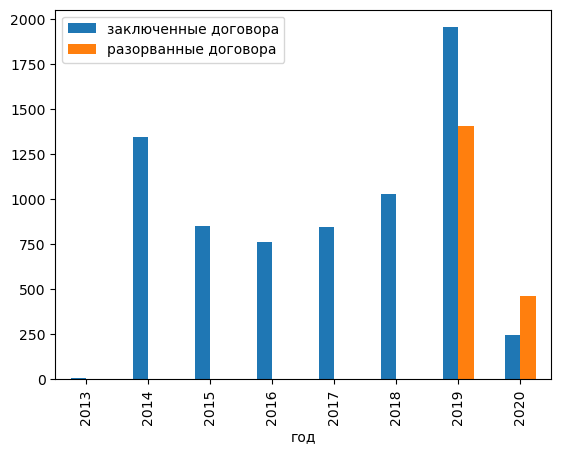

In [71]:
display(
    by_year.plot(x="год", y=["заключенные договора","разорванные договора"], kind="bar"),
    df_orig['end_date'].loc[(df_orig['end_date'] != "No")].value_counts().sort_index()
);

Данный график и распределение расторгнутых договоров по месяцам говорит нам о том, что клиенты за 5 лет не расторгли ни одного договора, а потом резко стали их расторгать, причем с некоей стабильностью по 460-470 каждый месяц. В этом мы видим аномалию данных. Единственное объяснение этому - срез базы данных был взят с 01.10.2019 по 01.02.2020. При этом в срез попали данные о заключенных, расторгнутых и действующих в это время контрактах. Но у нас нет ни одного договора, заключенного и расторгнутого до 01.10.2019, а это значит, что наша модель будет предвзята: она будет рассматривать договора, заключенные до 01.10.2019, практически никогда не расторгаемыми.

Проанализировав данные за 2020 год, хочется добавить, что компания теряет в среднем в 2 раза больше клиентов, чем привлекает.

Для обучения менее предвзятой модели, необходимо запросить более полный датасет, но т.к. других данных у нас нет, то мы будем дальше работать с этими.

Во время предобработки данных мы произвели следующие действия:  
 - Столбец `end_date` переименовали в `target`, это будет наш целевой признак. Значение `No` изменим на `0`, а информацию с датой окончания пользования услугами компании на `1`. Столбец приведем к типу данных `int`.
 - Создали столбец `service_start_days_ago_duration`. Это будет интерпритация столбца `begin_date`, он будет содержать количество дней со дня начала использования клиентом услугами компании по день среза базы данных.
 - Обнаружив аномалию, мы решили создать столбец `in_df`, который будет делить наш датафрейм на 2 части: договора заключенные до 01.10.2019 и после. Это должно помочь нашей модели справляться с аномалией.
 - Теперь столбец `begin_date` можно удалить.
 - В столбце `total_charges` удалили 11 пустых значений, а тип столбца сменим на `flat`.
 - Создали столбец `phone_service`, который содержит информацию, пользуется ли клиент услугой телефонной линии.
 - В столбцах `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` и `phone_service` заменили пропуски на значения `No`, чтобы получились бинарные признаки услуг компании. 
 - В столбце `senior_citizen` привели бинарный признак к единообразию с остальными.
 - Создали столбец `services_count`, который будет отражать количество подключенных услуг у клиента.

При анализе целевого признака, мы увидели распределение 3 к 1, что говорит о наличии пограничного дисбалланса:

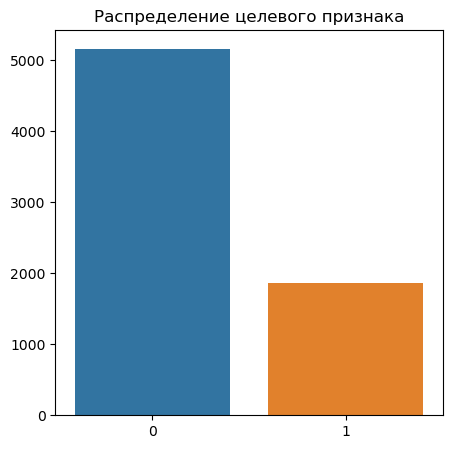

In [72]:
plt.subplots(figsize=(5, 5))
ax = sns.countplot(df['target'])
plt.setp(ax, xlabel=None, ylabel=None, title='Распределение целевого признака')
plt.show()

При анализе категориальных признаков, мы увидели несколько закономерностей:

 - распределение `Type` показывает, что клиенты заключившие договора на 1 и 2 года практически не покидают компанию.
 - распределение `Payment method` показывает, что клиенты предпочитающие `Electronic check` более склонны к разрыву договора.
 - распределение `Internet service` показывает, что клиенты предпочитающие `Fiber optic` более склонны к разрыву договора, возможно, стоит рекомендовать компании проверить качество оказания услуг оптоволоконной связи. Так же стоит отметить, что клиенты без подключения услуг интернета практически не разрывают договора с компанией.
 - клиенты, пользующиеся услугами `Online security` и `Tech support`, менее склонны к разрыву договора с компанией.
 - распределения `Gender`, `Senior citizen`, `Partner`, `Dependents`, `Phone service` и `Multiple lines` скорее всего слабо повлияют на обучаемость нашей модели, их можно рекомендовать к удалению.
 - в остальных признаках распределение близкое к нормальному.

При анализе численных признаков, мы можем выделить следующие закономерности:

 - Распределение `Total charges` выглядит нормально.  
 - По графику визуально можно определить, что гипотеза с ежемесячный платой `Monthly charges` (чем выше ежемесячная плата, тем выше вероятность, что клиент уйдет) подтверждается.  
 - Распределение `Service start days ago duration` показывает, что чем раньше клиент заключил договор с компанией, тем ниже шанс, что он разорвет договор.
 - Распределение `Services count` показывает, что клиенты пользующиеся 1, 6, 7, 8 или 9 услугами компании менее склонны к разрыву договора.

Проверив корреляцию мы можем сделать вывод, что у нас отсутствует корреляция целевого признака с другими признаками:

In [73]:
df_report.corr()

,target,monthly_charges,total_charges,service_start_days_ago_duration,services_count
target,1.000000,0.192858,-0.199484,-0.313547,-0.019644
monthly_charges,0.192858,1.000000,0.651065,0.259819,0.851408
total_charges,-0.199484,0.651065,1.000000,0.829135,0.777388
service_start_days_ago_duration,-0.313547,0.259819,0.829135,1.000000,0.480900
services_count,-0.019644,0.851408,0.777388,0.480900,1.000000


На основе исследовательского анализа распределения категориальных признаков и матрицы мультиколлинеарности, удалим следующие столбцы: `gender`, `senior_citizen`, `dependents`, `phone_service` и `partner`.

Далее мы выделили целевой признак и разбили датасет на тренировочную и тестовую выборки (с отношением 3 к 1) с использованием стратификации, чтобы сохранить дисбалланс целевого признака.

В нескольких пунктах данного раздела мы отошли от последовательности, заданной в изначальном плане, т.к. нам пришлось реагировать на обнаруженную аномалию и создавать синтетические признаки в процессе анализа и предобработки данных.  
Так же мы решили использовать pipeline в наших моделях, что позволит нам избежать утечки данных и более гибко настраивать кодирование и масштабирование признаков для каждой отдельновзятой модели. Это позволило исключить пункты кодирования и масштабирования признаков из плана.

## Выбор, обучение и тестирование моделей

Мы выбрали 5 моделей, которые будем учить предсказывать отток клиентов компании:  
   - Logistic Regression
   - Random Forest
   - LightGBM
   - CatBoost
   - Support Vector Machine

Мы старались выбирать разные модели: Линейные модели обучения с учителем, Бустинг, Бэггинг.  
Проверку моделей на адекватность мы выполняли с помощью Baseline-модели: DammyClassifier.  
При обучении моделей мы использовали:
 - pipeline, что позволило нам избежать утечки данных и более гибко настраивать кодирование и масштабирование признаков для каждой отдельновзятой модели
 - randomseachcv, для быстрой оптимизации гиперпараметров

На кроссвалидации были получены итоговые метрики, которые мы собрали в сводную таблицу:

In [74]:
display(models.sort_values('roc_auc_train', ascending=False))

,model_name,model_var,mean_fit_time,roc_auc_train
3,CatBoost,"{'model__random_state': 130323, 'model__n_esti...",1.1,0.946
2,LightGBM,"{'model__subsample_for_bin': 10000, 'model__ra...",1.5,0.936
1,Random Forest,"{'model__random_state': 130323, 'model__n_jobs...",0.9,0.894
0,Logistic Regression,"{'model__tol': 0.0001, 'model__solver': 'saga'...",0.2,0.836
4,Support Vector Machine,"{'model__verbose': 1, 'model__random_state': 1...",7.4,0.819
5,Dummy,NaN,NaN,0.500


Модель CatBoost показала лучшую ROC-AUC метрику, поэтому ее мы будем проверять на тестовой выборке.

## Итоговая модель

Модель CatBoost с лучшими гиперпараметрами:
{'model__random_state': 130323, 'model__n_estimators': 426, 'model__metric_period': 100, 'model__max_depth': 2, 'model__loss_function': 'Logloss', 'model__learning_rate': 0.5, 'model__l2_leaf_reg': 7, 'model__eval_metric': 'AUC'}

ROC-AUC на тренировочной выборке: 0.955
Accuracy на тренировочной выборке: 0.910


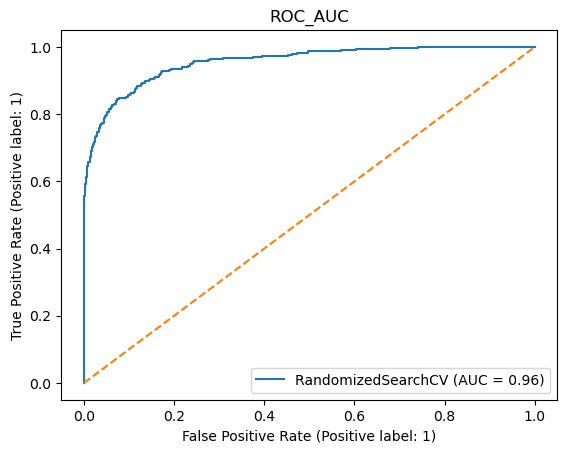

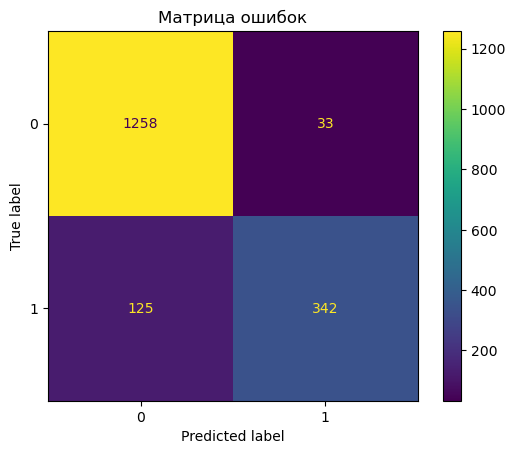

In [75]:
    print('Модель CatBoost с лучшими гиперпараметрами:')
    print(rscv_cb.best_params_)
    print('')
    print('ROC-AUC на тренировочной выборке: {:.3f}'.format(auc_roc_test))
    print('Accuracy на тренировочной выборке: {:.3f}'.format(accuracy_test))
    
    plot_roc_curve(rscv_cb, features_test, target_test)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC_AUC')
    plt.show()
    
    plot_confusion_matrix(rscv_cb, features_test, target_test)
    plt.title('Матрица ошибок')
    plt.show()

Модель, на тестовой выборке, показала даже лучший результат, чем тренировочной.  
В целом матрица ошибок соответствует поведению нашей модели:
 - большинство пользователей продолжает пользоваться услугами компании, некоторые уходят. модель достаточно хорошо их определяет.
 - модель предсказывает, что пользователь останется, а он на самом деле уходит (False Negative), это объясняется найденой нами аномалией, т.к. наша модель предвзято относится к пользователям, заключившим контракт до 2019-10-01.

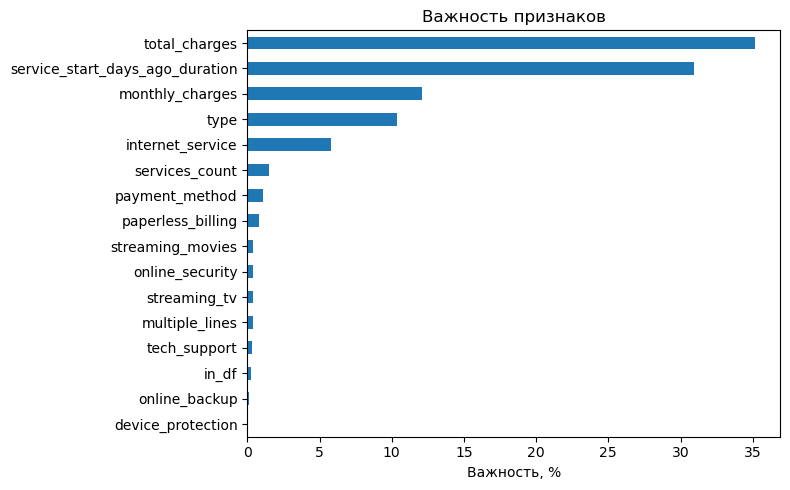

In [76]:
fig, ax = plt.subplots(figsize=(8,5))
imp.plot.barh(ax=ax)
ax.set_title("Важность признаков")
ax.set_xlabel('Важность, %')
fig.tight_layout()

In [77]:
round(imp.sort_values(ascending=False),2).head(5)

total_charges                      35.13
service_start_days_ago_duration    30.91
monthly_charges                    12.09
type                               10.38
internet_service                    5.81
dtype: float64

Самыми важными для нашей модели оказались признаки: суммарные траты клиентов (`total_charges`) и время с начала пользования услугами по дату среза базы данных (`service_start_days_ago_duration`).

## Заключение

В процессе работы нам пришлось отступить от разработанного плана. В нескольких пунктах (анализ, предобработка и создание признаков) мы отошли от последовательности, заданной в изначальном плане, т.к. нам пришлось реагировать на обнаруженную аномалию и создавать синтетические признаки в процессе анализа и предобработки данных.  
Так же мы решили использовать pipeline в наших моделях, что позволит нам избежать утечки данных и более гибко настраивать кодирование и масштабирование признаков для каждой отдельновзятой модели. Это позволило исключить пункты кодирования и масштабирования признаков из плана.

Во время анализа, мы столкнулись с несколькими трудносятми. Мы обнаружили аномалию, которая повлияла на предвзятость нашей модели. Мы создали несколько синтетических признаков, чтобы невилировать влияние аномалии, но всеравно модель остается предвзятой.  
Во время формирования признаков, мы выделили для каждого клитента год начала обслуживания в отдельный признак, но потом отказались от этого из-за возможности утечки целевого признака.

Все этапы проделанной работы важны: анализ данных, предобработка, формирование признаков, обучение и тестирование моделей. Если допустить ошибку на каком-то из них, то можно получить неудовлетворительный результат, поэтому трудно выделить какой-то ключевой. На мой взгляд, ключевым моментом в задачах бинарной классификации, может быть, правильное определение целевого признака и формирование остальных признаков, на которых будет обучаться наша модель. Не менее важно умение анализировать данные и рассматривать их с точки зрения адекватности, а не погони за лучшей метрикой.

В итоге, мы разработали модель, показавшую ROC-AUC метрику: 0.955, что удовлетворяет поставленной цели.  
Мы определили, что за последний месяц с компанией разорвало договор в 2 раза больше клиентов, чем заключило новых. В денежном эквиваленте, это 33384,7 денежных средств, которые компания не получит в следующем месяце. Основываясь на матрице ошибок, мы можем утверждать, что модель верно предсказала бы уход 73% этих клиентов, что эквивалентно 24447,6 денежных средств, не считая затрат на удержание этих клиентов (скидки  и акции).

In [78]:
df_orig['monthly_charges'].loc[(df_orig['end_date'] == "2020-01-01 00:00:00")].sum()

33384.7

Рекомендации компании:  
- Предоставить более полный набор данных, для улучшения работы модели.
- Срочно начать компанию по удержанию клиентов.
- Обратить внимание на признаки, оказавшиеся ключевыми для модели: общие и месячные траты клиентов, длительность заключенного договора с клиентом, тип договора и услуги интернет сервиса. (эти же признаки фигурировали в исследовании категориальных признаков с подробными выводами).